# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)



(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Show a lineplot of fraction of total variance vs. number of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

In [5]:
#def P1():

### STUDENT START ###

#Approach:
#Fit the training data to the PCA
#Get the explained variance
#Compute the cumulative variance

k = [1,2,3,4,5,10,20,30,40,50]
explained_variance = [list() for f in range(50)]
cumulative_variance = [list() for f in range(50)]
index = 0

pca = PCA(n_components=50)
pca.fit(train_data) 
explained_variance = pca.explained_variance_ratio_

cumulative_variance[0] = float("{0:.3f}".format(explained_variance[0]))

for index in range(1,50):
    cumulative_variance[index] = float("{0:.3f}".format(cumulative_variance[index -1] + explained_variance[index]))

plot = []
for item in k:
    plot.append(cumulative_variance[item-1])
    print('Fraction of total variance explained by first', item, 'principal component(s) = ', cumulative_variance[item-1])

    
### STUDENT END ###

#P1()

Fraction of total variance explained by first 1 principal component(s) =  0.164
Fraction of total variance explained by first 2 principal component(s) =  0.297
Fraction of total variance explained by first 3 principal component(s) =  0.399
Fraction of total variance explained by first 4 principal component(s) =  0.47
Fraction of total variance explained by first 5 principal component(s) =  0.509
Fraction of total variance explained by first 10 principal component(s) =  0.652
Fraction of total variance explained by first 20 principal component(s) =  0.807
Fraction of total variance explained by first 30 principal component(s) =  0.897
Fraction of total variance explained by first 40 principal component(s) =  0.949
Fraction of total variance explained by first 50 principal component(s) =  0.98


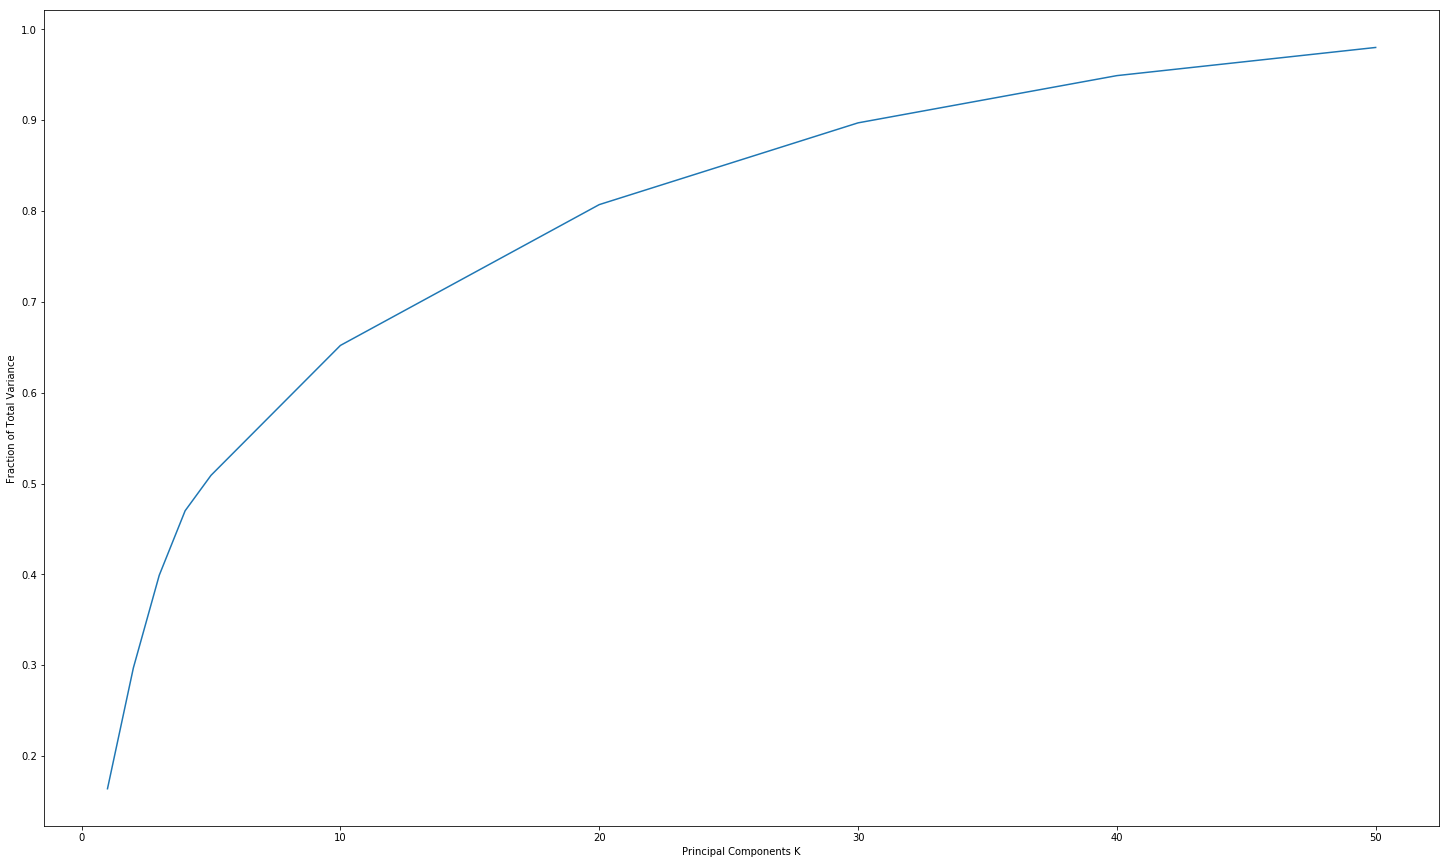

In [6]:

plt.rc('figure', figsize=[25,15])

plot_redim = np.array(plot)[:, np.newaxis]
line_chart1 = plt.plot(k, plot_redim)
plt.xlabel('Principal Components K')
plt.ylabel('Fraction of Total Variance')
plt.show()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

In [7]:
#def P2():

### STUDENT START ###
import pandas as pd
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(train_data)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

### STUDENT END ###

#P2()

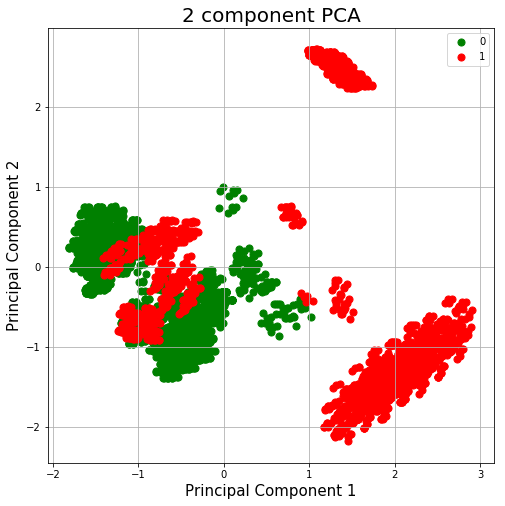

In [8]:
#plot a 2 component PCA with green and red colors for '0' and '1' targets (non-poisonous and poisonous respectively)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['g', 'r']
for target, color in zip(targets,colors):
    indicesToKeep = train_labels == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Part 3: 

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

In [9]:
#Transform test data into PCA

principalComponents_test = pca.transform(test_data)
principalDf_test = pd.DataFrame(data = principalComponents_test, columns = ['principal component 1', 'principal component 2'])

testDf = pd.concat((principalDf_test, pd.DataFrame(data=test_labels, columns = ['target'])), axis = 1)


In [10]:
#Function returns a corresponding distance array containing the maximum points for all centroids respectively
def findMaxDistantPoint(valuesDf, centroids, labels):
    dist = []
    max = 0
    rowIndex = 0
    clusterIndex = 0
    for clusterIndex in range(0, centroids.shape[0]):
        clusterDf = valuesDf[labels==clusterIndex]
        max=0
        for index in range(0, clusterDf.shape[0]):
            x = clusterDf.iloc[index]['principal component 1']
            y = clusterDf.iloc[index]['principal component 2']
            #compute square of distances from centroids
            distance = (x-centroids[clusterIndex][0]) ** 2 + (y-centroids[clusterIndex][1]) ** 2
            if  distance > max:
                max = distance
        dist.append(max ** 0.5) #get the square root of the distance squared of the farthest point

    return dist

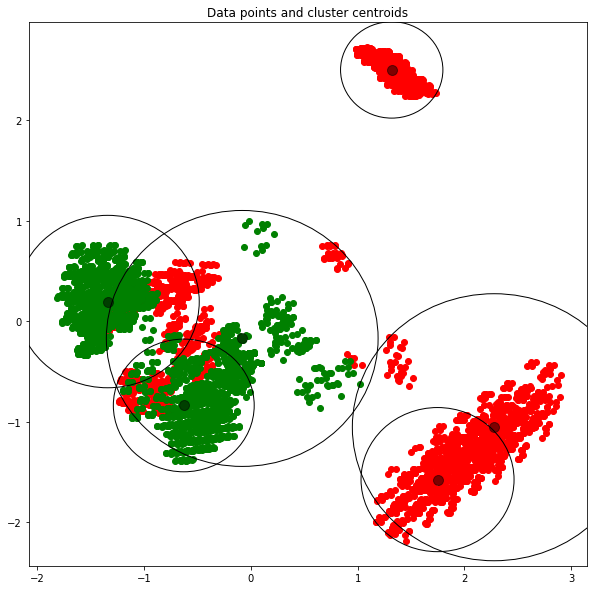

In [11]:
#def P3():

### STUDENT START ###

#Run a kmeans models and plot the circles with centroids as centers of the circles and distance as the radii

kmeans = KMeans(n_clusters=6, random_state=0, init='random',
        n_init=10, max_iter=300,
        tol=1e-04).fit(principalDf[['principal component 1', 'principal component 2']])

distance = findMaxDistantPoint(principalDf, kmeans.cluster_centers_, kmeans.labels_)

# create a new figure
plt.figure(figsize = (10,10))
ax = plt.gca()
for a, b, radius in zip(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], distance):
    # plot circles using the RGBA colors
    circle = plt.Circle((a, b), radius, fill=False)
    ax.add_artist(circle)


poisonousDf = principalDf.loc[(train_labels == 1)]
non_poisonousDf = principalDf.loc[(train_labels == 0)]

plt.scatter(poisonousDf['principal component 1'].to_numpy(), poisonousDf['principal component 2'].to_numpy(), c='red')    
plt.scatter(non_poisonousDf['principal component 1'].to_numpy(), non_poisonousDf['principal component 2'].to_numpy(), c='green')    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black',  s=100, alpha=0.5)

plt.title('Data points and cluster centroids')
plt.show()
### STUDENT END ###

#P3()

### Part 4: 

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show plots of the estimated density contours.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

In [12]:

# display predicted scores by the model as a contour plot
def DrawContourPlot(n_comp, cov_type, plotIndex):
    x1 = np.linspace(-2., 2.)
    y1 = np.linspace(-2., 2.)
    X1, Y1 = np.meshgrid(x1, y1)
    XX = np.array([X1.ravel(), Y1.ravel()]).T
    gmm_train = GaussianMixture(n_components=n_comp, covariance_type= cov_type, random_state=12345)
    gmm_train.fit(poisonousDf)
    Z = -gmm_train.score_samples(XX)
    Z = Z.reshape(X1.shape)
    plt.subplot(4,4, plotIndex)
    plotIndex = plotIndex + 1
    plt.scatter(poisonousDf['principal component 1'].to_numpy(), poisonousDf['principal component 2'].to_numpy(), c='red', s=0.5)
    CS = plt.contour(X1, Y1, Z)
    CB = plt.colorbar(CS, shrink=0.8, extend='both')
    plt.title('Negative log-likelihood predicted by a GMM')
    plt.axis('tight')
    plt.show()

Gaussian model with components =  1  and covariance type spherical = 47100.511


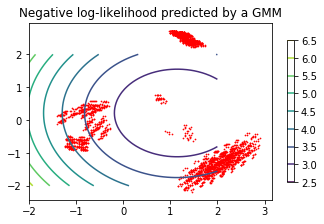

Gaussian model with components =  1  and covariance type diag = 47033.776


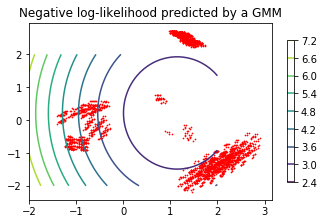

Gaussian model with components =  1  and covariance type tied = 47042.629


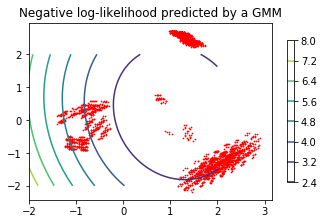

Gaussian model with components =  1  and covariance type full = 47042.629


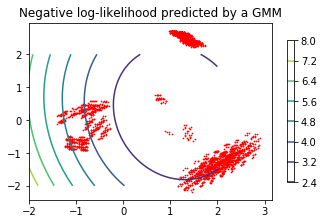

Gaussian model with components =  2  and covariance type spherical = 39077.839


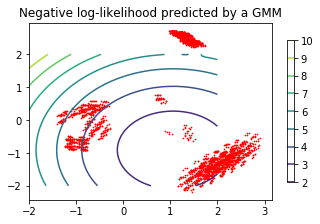

Gaussian model with components =  2  and covariance type diag = 36522.077


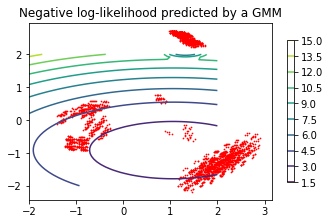

Gaussian model with components =  2  and covariance type tied = 36818.509


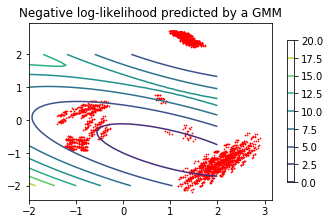

Gaussian model with components =  2  and covariance type full = 30634.516


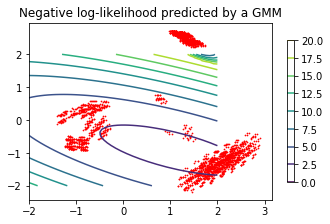

Gaussian model with components =  3  and covariance type spherical = 26920.586


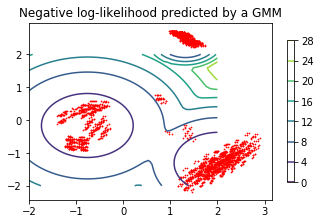

Gaussian model with components =  3  and covariance type diag = 26897.85


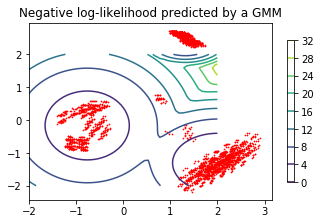

Gaussian model with components =  3  and covariance type tied = 29425.553


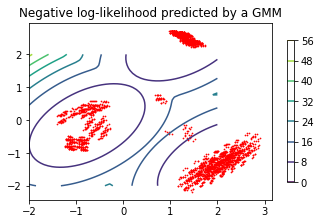

Gaussian model with components =  3  and covariance type full = 23284.895


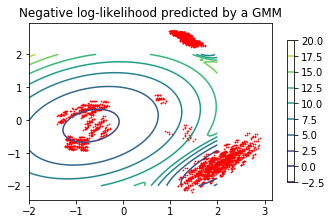

Gaussian model with components =  4  and covariance type spherical = 22505.426


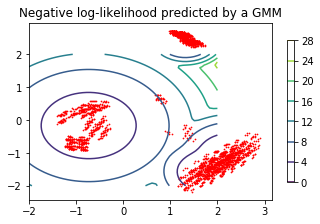

Gaussian model with components =  4  and covariance type diag = 22364.948


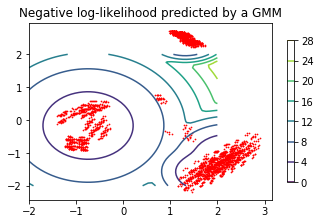

Gaussian model with components =  4  and covariance type tied = 24274.853


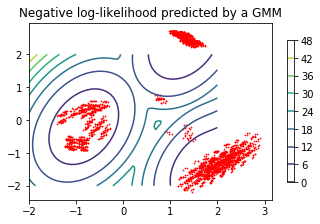

Gaussian model with components =  4  and covariance type full = 19811.929


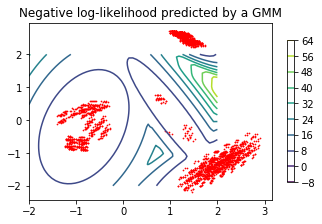

In [13]:
#def P4():

### STUDENT START ###
covariance_type = ['spherical', 'diag', 'tied', 'full']
components = [1,2,3,4]
ari = []
plotIndex = 0
bic = []
#Displays the various log-likelihoods predicted by GMMs with various covariance types and components
for com_index in range(0,4):
    plotIndex = 0
    for cov_index in range(0,4):
        gmm = GaussianMixture(n_components=components[com_index], covariance_type=covariance_type[cov_index], random_state=12345)
        gmm.fit(principalDf)
        gmm_labels = gmm.predict(principalDf)
        score = float("{0:.3f}".format(gmm.bic(principalDf)))
        print('Gaussian model with components = ', components[com_index], ' and covariance type', covariance_type[cov_index], '=', score)
        bic.append(score)
        plotIndex = plotIndex + 1
        DrawContourPlot(components[com_index], covariance_type[cov_index], plotIndex)

bic = np.array(bic)

#     ### STUDENT END ###
#P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy or you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [14]:
#def P5():

### STUDENT START ###

#Returns accuracy for a given combination of gmm component #, pca component #, covariance type
def GaussianModel(n_comp, n_pca, poisonousDf, non_poisonousDf, principalDf_test, cov_type):
    gmm_poisonous = GaussianMixture(n_components=n_comp, covariance_type=cov_type, random_state=12345)
    gmm_poisonous.fit(poisonousDf)
    logProb_poisonous = gmm_poisonous.score_samples(principalDf_test)
   
    gmm_nonpoisonous = GaussianMixture(n_components=n_comp, covariance_type=cov_type, random_state=12345)
    gmm_nonpoisonous.fit(non_poisonousDf)
    logProb_nonpoisonous = gmm_nonpoisonous.score_samples(principalDf_test)
    
    predicted_target = np.where(logProb_poisonous > logProb_nonpoisonous, 1, 0)
    accuracy = metrics.accuracy_score(predicted_target, test_labels)
    accuracy = float("{0:.3f}".format(accuracy))
    return accuracy
    
    
### STUDENT END ###

#P5()

### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

$$( (3 \, mean \, vectors + 3 \, covariance \, matrices) * 2 \, gmm \, components ) * 2 \, classes = 24 \, parameters$$

In [15]:
#def P6():

### STUDENT START ###

accuracy = []
accuracyDf = pd.DataFrame(columns=('PCA Components', 'GMM Components', 'Cov_type', 'Accuracy'))

#compute the accuracy for each gmm component variable, for each pca count variable and for each covariance type
for component in range(1,25):
    for pca_count in range(1,50):
        for cov_type in ['full', 'diag', 'tied', 'spherical']:
            if (component * pca_count * 2 * 2 < 50): 
                #Multiply by a factor of 2 for mean vectors and co-variance matrices and by 2 for # of classes
                pca = PCA(n_components=pca_count)
                principalComponents = pca.fit_transform(train_data)
                principalComponents_test = pca.transform(test_data)
                principalDf = pd.DataFrame(data = principalComponents)
                principalDf_test = pd.DataFrame(data = principalComponents_test)        
                poisonousDf = principalDf.loc[(train_labels == 1)]
                non_poisonousDf = principalDf.loc[(train_labels == 0)]
                acc = GaussianModel(component, pca_count, poisonousDf, non_poisonousDf, principalDf_test, cov_type)
                accuracyDf = accuracyDf.append({'PCA Components': pca_count, 'GMM Components': component, 'Cov_type': cov_type, 'Accuracy': acc}, ignore_index=True)
                

sort_by_accuracy = accuracyDf.sort_values('Accuracy', ascending=False)
print('All combinations sorted in descending order of accuracies\n')
print(sort_by_accuracy)
print('Model with the highest accuracy:')
print(sort_by_accuracy.head(n=1))
# ### STUDENT END ###

#P6()

All combinations sorted in descending order of accuracies

    PCA Components GMM Components   Cov_type  Accuracy
86               4              3       tied     0.970
68               6              2       full     0.966
40              11              1       full     0.965
24               7              1       full     0.965
42              11              1       tied     0.965
26               7              1       tied     0.965
70               6              2       tied     0.964
34               9              1       tied     0.964
32               9              1       full     0.964
46              12              1       tied     0.963
44              12              1       full     0.963
28               8              1       full     0.963
30               8              1       tied     0.963
64               5              2       full     0.960
99               3              4  spherical     0.959
96               3              4       full     0.958
66    